In [16]:
import pandas as pd
import os
from glob import glob

# Directory containing images
image_folder = '/Users/ninageyer/Downloads/downloaded_images/Earthcam_NewYork'
image_paths = glob(os.path.join(image_folder, '*.jpg'))

In [17]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolov8n.pt')  # or the path to your trained model

# Perform inference on images
results_dict = {}
for image_path in image_paths:
    results = model(image_path)
    results_dict[os.path.basename(image_path)] = results



image 1/1 /Users/ninageyer/Downloads/downloaded_images/Earthcam_NewYork/New York_06-25-2019_109.jpg: 384x640 1 person, 2 cars, 66.3ms
Speed: 1.4ms preprocess, 66.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/ninageyer/Downloads/downloaded_images/Earthcam_NewYork/New York_06-29-2022_35.jpg: 384x640 (no detections), 54.0ms
Speed: 1.1ms preprocess, 54.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/ninageyer/Downloads/downloaded_images/Earthcam_NewYork/New York_06-23-2022_92.jpg: 384x640 2 persons, 1 car, 2 umbrellas, 59.0ms
Speed: 1.2ms preprocess, 59.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/ninageyer/Downloads/downloaded_images/Earthcam_NewYork/New York_06-30-2022_25.jpg: 384x640 4 persons, 1 car, 2 umbrellas, 1 sink, 63.3ms
Speed: 1.4ms preprocess, 63.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/ninageyer/Downloads/down

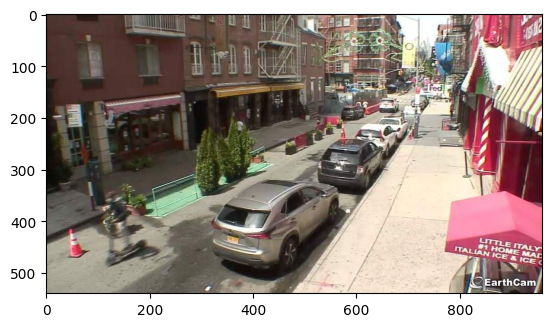

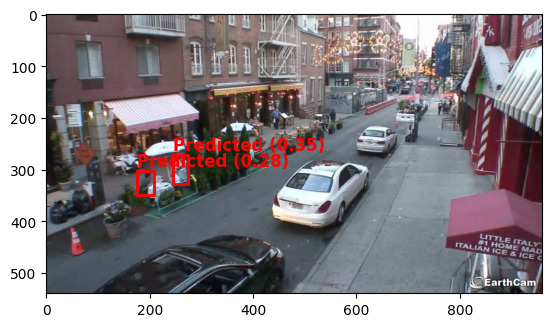

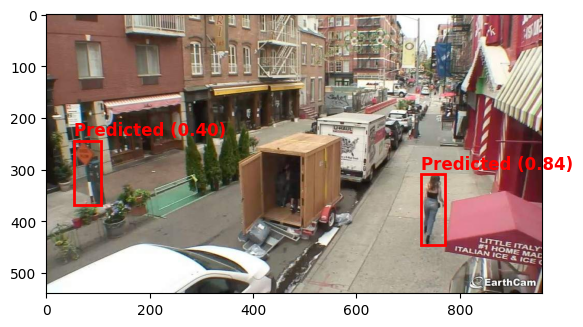

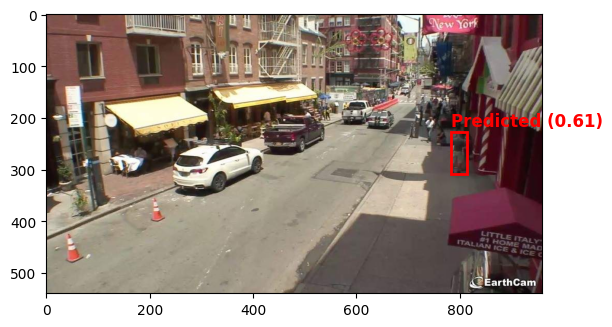

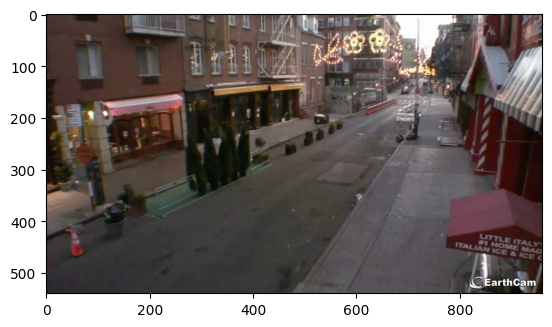

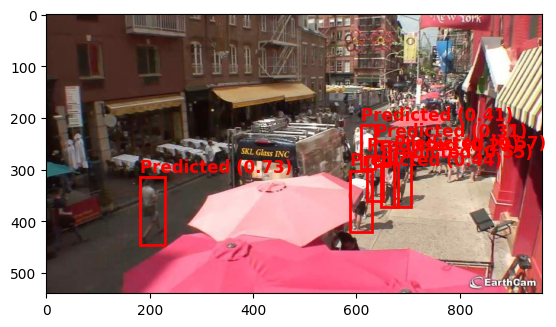

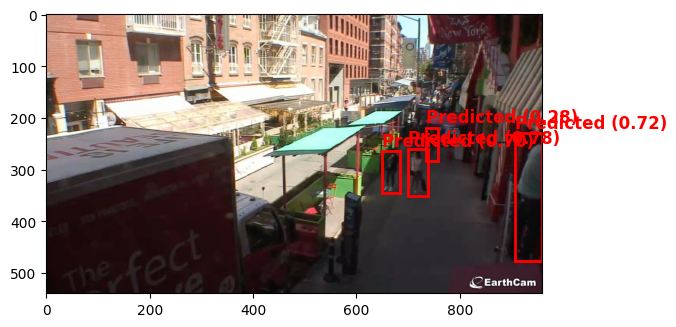

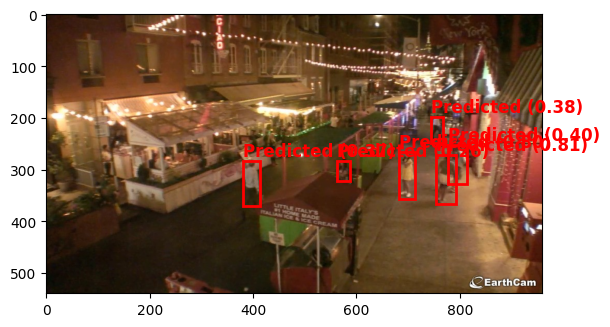

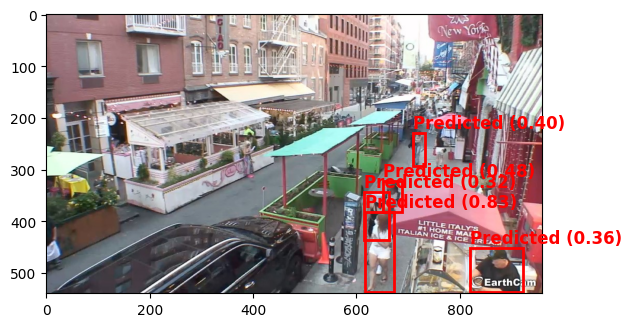

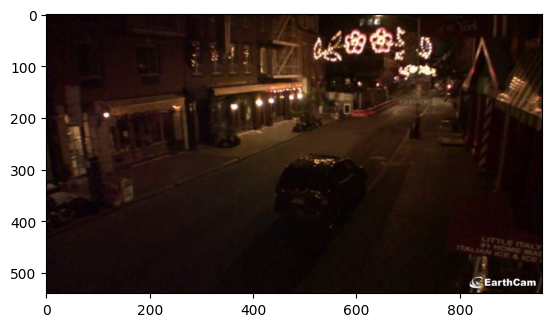

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

def visualize_detections(image_path, results):
    img = Image.open(image_path)
    img_width, img_height = img.size
    
    # Plot the image
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    # YOLO detections
    detections = results[0].boxes.data.numpy()  # Convert detections to numpy array
    for detection in detections:
        x_min, y_min, x_max, y_max, conf, cls_id = detection
        if int(cls_id) == 0:  # Check if the class ID is 0 (human)
            width = x_max - x_min
            height = y_max - y_min
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(x_min, y_min - 10, f'Predicted ({conf:.2f})', color='red', fontsize=12, weight='bold')

    plt.show()

# Visualize for each image
sampled_images = random.sample(image_paths, 10)
for image_path in sampled_images:
    img_name = os.path.basename(image_path)
    results = results_dict[img_name]
    visualize_detections(image_path, results)
